In [2]:
pip install pandas --user

     |████████████████████████████████| 12.2 MB 1.0 MB/s eta 0:00:01
     |████████████████████████████████| 498 kB 877 kB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Flatten, Rescaling, RandomFlip, RandomRotation
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from tensorflow.keras import layers, models, Model
from sklearn.metrics import r2_score

In [6]:
url = './preprocess_image_resize'

In [7]:
generator = ImageDataGenerator(
    rescale= 1. / 255
)

In [8]:
url2 = './2012_2019_PlatteRiverWeir_features_merged_all.csv'
df = pd.read_csv(url2)
df.head()

,SensorTime,CaptureTime,Filename,Agency,SiteNumber,TimeZone,Stage,Discharge,CalcTimestamp,width,...,WeirPt2X,WeirPt2Y,WwRawLineMin,WwRawLineMax,WwRawLineMean,WwRawLineSigma,WwCurveLineMin,WwCurveLineMax,WwCurveLineMean,WwCurveLineSigma
0,2012-06-09 13:15:00,2012-06-09T13:09:07,StateLineWeir_20120609_Farrell_001.jpg,USGS,6674500,MDT,2.99,916.0,2020-03-11T16:58:28,4288,...,-1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2012-06-09 13:15:00,2012-06-09T13:10:29,StateLineWeir_20120609_Farrell_002.jpg,USGS,6674500,MDT,2.99,916.0,2020-03-11T16:58:33,4288,...,-1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2012-06-09 13:45:00,2012-06-09T13:44:01,StateLineWeir_20120609_Farrell_003.jpg,USGS,6674500,MDT,2.96,873.0,2020-03-11T16:58:40,4288,...,-1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2012-06-09 14:45:00,2012-06-09T14:44:30,StateLineWeir_20120609_Farrell_004.jpg,USGS,6674500,MDT,2.94,846.0,2020-03-11T16:58:47,4288,...,-1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2012-06-09 15:45:00,2012-06-09T15:44:59,StateLineWeir_20120609_Farrell_005.jpg,USGS,6674500,MDT,2.94,846.0,2020-03-11T16:58:55,4288,...,-1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df[' Filename'] = './preprocess_image_resize/' + df[' Filename'].astype(str)

In [10]:
df.head()

,SensorTime,CaptureTime,Filename,Agency,SiteNumber,TimeZone,Stage,Discharge,CalcTimestamp,width,...,WeirPt2X,WeirPt2Y,WwRawLineMin,WwRawLineMax,WwRawLineMean,WwRawLineSigma,WwCurveLineMin,WwCurveLineMax,WwCurveLineMean,WwCurveLineSigma
0,2012-06-09 13:15:00,2012-06-09T13:09:07,./preprocess_image_resize/StateLineWeir_201206...,USGS,6674500,MDT,2.99,916.0,2020-03-11T16:58:28,4288,...,-1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2012-06-09 13:15:00,2012-06-09T13:10:29,./preprocess_image_resize/StateLineWeir_201206...,USGS,6674500,MDT,2.99,916.0,2020-03-11T16:58:33,4288,...,-1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2012-06-09 13:45:00,2012-06-09T13:44:01,./preprocess_image_resize/StateLineWeir_201206...,USGS,6674500,MDT,2.96,873.0,2020-03-11T16:58:40,4288,...,-1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2012-06-09 14:45:00,2012-06-09T14:44:30,./preprocess_image_resize/StateLineWeir_201206...,USGS,6674500,MDT,2.94,846.0,2020-03-11T16:58:47,4288,...,-1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2012-06-09 15:45:00,2012-06-09T15:44:59,./preprocess_image_resize/StateLineWeir_201206...,USGS,6674500,MDT,2.94,846.0,2020-03-11T16:58:55,4288,...,-1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
dfTrain = df

In [12]:
df['Year'] = df[' CaptureTime'].str.slice(0, 4)

In [13]:
df.head()

,SensorTime,CaptureTime,Filename,Agency,SiteNumber,TimeZone,Stage,Discharge,CalcTimestamp,width,...,WeirPt2Y,WwRawLineMin,WwRawLineMax,WwRawLineMean,WwRawLineSigma,WwCurveLineMin,WwCurveLineMax,WwCurveLineMean,WwCurveLineSigma,Year
0,2012-06-09 13:15:00,2012-06-09T13:09:07,./preprocess_image_resize/StateLineWeir_201206...,USGS,6674500,MDT,2.99,916.0,2020-03-11T16:58:28,4288,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2012
1,2012-06-09 13:15:00,2012-06-09T13:10:29,./preprocess_image_resize/StateLineWeir_201206...,USGS,6674500,MDT,2.99,916.0,2020-03-11T16:58:33,4288,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2012
2,2012-06-09 13:45:00,2012-06-09T13:44:01,./preprocess_image_resize/StateLineWeir_201206...,USGS,6674500,MDT,2.96,873.0,2020-03-11T16:58:40,4288,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2012
3,2012-06-09 14:45:00,2012-06-09T14:44:30,./preprocess_image_resize/StateLineWeir_201206...,USGS,6674500,MDT,2.94,846.0,2020-03-11T16:58:47,4288,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2012
4,2012-06-09 15:45:00,2012-06-09T15:44:59,./preprocess_image_resize/StateLineWeir_201206...,USGS,6674500,MDT,2.94,846.0,2020-03-11T16:58:55,4288,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2012


In [14]:
dfTrain = df[df['Year'] != '2015']

In [15]:
dfTrain = dfTrain[dfTrain['Year'] != '2016']

In [16]:
dfTrain = dfTrain[dfTrain['Year'] != '2017']

In [17]:
dfTest = df[df['Year'] <= '2017']

In [18]:
dfTest = dfTest[dfTest['Year'] >= '2015']

In [19]:
train = generator.flow_from_dataframe(
    dataframe=dfTrain,
    x_col=' Filename',
    y_col=' Stage',
    target_size=(224, 224),
    batch_size=8, 
    class_mode='raw',
    validate_filenames=True
)

Found 23462 validated image filenames.


In [20]:
test = generator.flow_from_dataframe(
    dataframe=dfTest,
    x_col=' Filename',
    y_col=' Stage',
    target_size=(224, 224),
    batch_size=8, 
    class_mode='raw',
    validate_filenames=True
)

Found 13248 validated image filenames.


In [21]:
def adapt_efficient_net() -> Model:
    inputs = layers.Input(
        shape=(224, 224, 3)
    )  # input shapes of the images should always be 224x224x3 with EfficientNetB0
    # use the downloaded and converted newest EfficientNet wheights
    model = EfficientNetB0(include_top=False, input_tensor=inputs)

    # Rebuild top
    x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
    x = layers.BatchNormalization()(x)
    top_dropout_rate = 0.4
    x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
    outputs = layers.Dense(1, activation="linear")(x)

    # Compile
    model = keras.Model(inputs, outputs)
    
    return model

In [22]:
model = adapt_efficient_net()

16705208/16705208 [==============================] - 4s 0us/step


In [23]:
def compile_model(model):
    sgd = SGD(learning_rate = 0.01, decay = 1e-6, momentum = 0.9, nesterov = True)
    model.compile(optimizer = 'adam', loss='mse', metrics=[tf.keras.metrics.MeanAbsoluteError(), tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.MeanAbsolutePercentageError()], run_eagerly = True)
# , mae, rsmse, r2, stand_error

In [24]:
def fit_model(model, train_data, validation_data):
    training_history = model.fit(train_data, batch_size=64, epochs=15, validation_data=validation_data)
    return training_history

In [25]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=2)
#learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience=2, verbose=1, factor=0.5, min_lr=0.00001)


In [26]:
def fit_model_w_early_stopping(model, train_data, validation_data):
    training_history = model.fit(train_data, 
                                 batch_size=64, 
                                 epochs=10, 
                                 validation_data=validation_data,
                                 callbacks = [earlystop])
    return training_history

In [27]:
compile_model(model)

In [28]:
training_history = fit_model(model, train, test)

Epoch 1/15
2933/2933 [==============================] - 2029s 649ms/step - loss: 0.9572 - mean_absolute_error: 0.5952 - root_mean_squared_error: 0.9784 - mean_absolute_percentage_error: 302976.0625 - val_loss: 1.1567 - val_mean_absolute_error: 0.7919 - val_root_mean_squared_error: 1.0755 - val_mean_absolute_percentage_error: 442767.3438
Epoch 2/15
2933/2933 [==============================] - 1904s 649ms/step - loss: 0.1369 - mean_absolute_error: 0.2735 - root_mean_squared_error: 0.3700 - mean_absolute_percentage_error: 373317.4062 - val_loss: 3.7132 - val_mean_absolute_error: 0.8578 - val_root_mean_squared_error: 1.9270 - val_mean_absolute_percentage_error: 635861.4375
Epoch 3/15
2933/2933 [==============================] - 1877s 640ms/step - loss: 0.1438 - mean_absolute_error: 0.2788 - root_mean_squared_error: 0.3793 - mean_absolute_percentage_error: 358098.4062 - val_loss: 5.6697 - val_mean_absolute_error: 2.2851 - val_root_mean_squared_error: 2.3811 - val_mean_absolute_percentage_er

In [29]:
model.evaluate(test, batch_size=64)

1656/1656 [==============================] - 294s 178ms/step - loss: 0.1840 - mean_absolute_error: 0.3384 - root_mean_squared_error: 0.4290 - mean_absolute_percentage_error: 593236.6250


[0.1840379536151886, 0.3384461998939514, 0.4289964437484741, 593236.625]

In [30]:
training_history.history

{'loss': [0.9571744203567505,
  0.1368744671344757,
  0.14384542405605316,
  0.11641224473714828,
  0.09838449209928513,
  0.0851055160164833,
  0.08230338990688324,
  0.07366324961185455,
  0.07192663848400116,
  0.06640452146530151,
  0.06405436992645264,
  0.06040606275200844,
  0.06139815226197243,
  0.059997089207172394,
  0.05912652611732483],
 'mean_absolute_error': [0.5952418446540833,
  0.27347612380981445,
  0.27884286642074585,
  0.25808629393577576,
  0.24218910932540894,
  0.22727417945861816,
  0.22425085306167603,
  0.21315260231494904,
  0.21066485345363617,
  0.2036866694688797,
  0.20177626609802246,
  0.19536082446575165,
  0.1965264528989792,
  0.19336152076721191,
  0.19298510253429413],
 'root_mean_squared_error': [0.9783529043197632,
  0.36996549367904663,
  0.3792695999145508,
  0.341192364692688,
  0.3136630356311798,
  0.29172849655151367,
  0.28688567876815796,
  0.2714097499847412,
  0.2681914269924164,
  0.25769075751304626,
  0.25308963656425476,
  0.24577

In [31]:
import json

# as requested in comment
exDict = {'exDict': training_history.history}

with open('file.txt', 'w') as file:
     file.write(json.dumps(exDict))

In [32]:
fig, ax = plt.subplots()

In [33]:
X = np.linspace(0, 1, 15)
Y1 = training_history.history['loss']
Y2 = training_history.history['val_loss']
ax.plot(X, Y1, X, Y2)
fig.show()

In [34]:
weights = model.get_weights()  # Recupera el estado del modelo.
model.set_weights(weights) #set weigths

In [35]:
weights

[array([0.485, 0.456, 0.406], dtype=float32),
 array([0.229, 0.224, 0.225], dtype=float32),
 0,
 array([[[[ 1.29107878e-01,  9.41870570e-01, -1.06105208e+00,
            6.30033791e-01,  5.48671149e-02, -2.05944970e-01,
            1.21766575e-01,  6.74855486e-02, -6.71395838e-01,
           -7.75986090e-02,  3.32969218e-01, -9.07117277e-02,
           -3.29444766e-01, -1.10095382e+00, -2.37684041e-01,
           -3.83787274e-01,  1.63041815e-01,  3.13305646e-01,
            7.18154252e-01,  1.63677022e-01,  7.97364935e-02,
            8.46856415e-01,  3.33057523e-01,  1.10478401e-01,
            1.91393662e-02, -5.66354811e-01,  3.21413368e-01,
            1.34573460e-01,  7.89148267e-03, -4.06865310e-03,
           -2.81245768e-04, -1.62955701e-01],
          [ 1.73243344e-01,  1.67028439e+00, -1.88765395e+00,
            9.84471381e-01,  6.09036349e-02,  2.04195604e-01,
            2.78688092e-02, -4.08629566e-01,  7.13195384e-01,
           -1.92216441e-01,  2.56186366e-01, -1.0392

In [36]:
np.savetxt('weight_efficientnetasdasd.csv' , weights , fmt='%s', delimiter=',')

/.local/lib/python3.8/site-packages/numpy/lib/npyio.py:1533: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.asarray(X)


In [37]:
predictions = model.predict(test)

1656/1656 [==============================] - 269s 162ms/step


In [38]:
np.savetxt("predictions_efficient.csv", predictions, delimiter=",")

In [39]:
Y_Real = test[0][1]
for i in range(1,len(test),1):
    Y_Real = np.concatenate((Y_Real, test[i][1]))

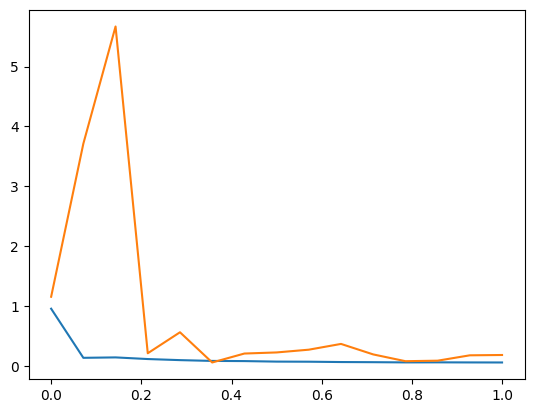

In [55]:
fig, ax = plt.subplots()
X = np.linspace(0, 1, 15)
Y1 = training_history.history['loss']
Y2 = training_history.history['val_loss']
ax.plot(X, Y1, X, Y2)
fig

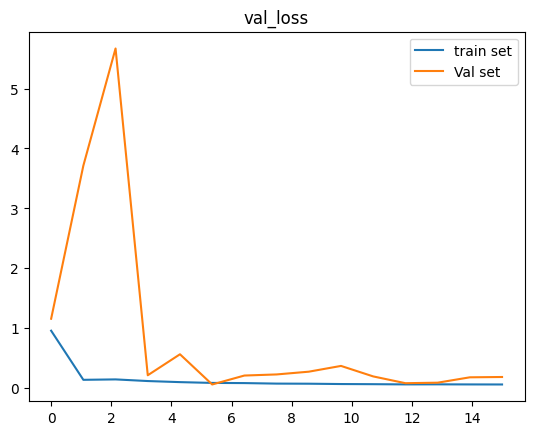

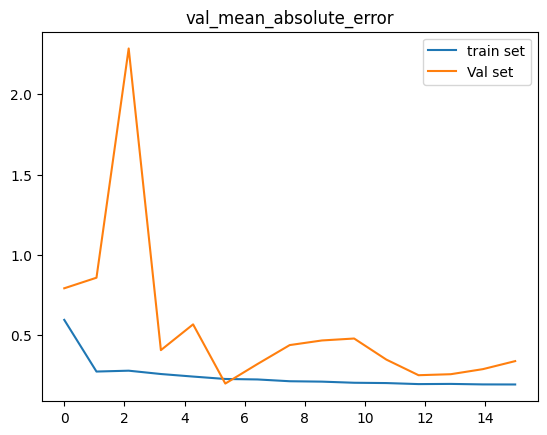

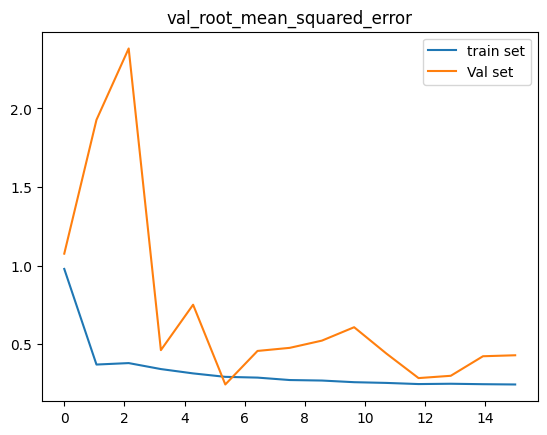

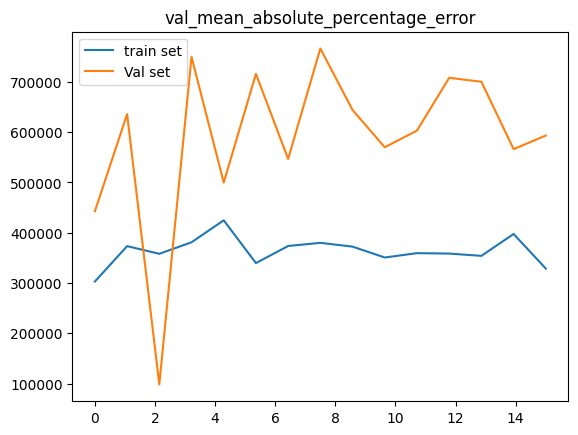

In [63]:
grf = list(training_history.history.keys())

ls1 = grf[4:]
ls2 = grf[:4]
for i in range(4):
    fig, ax = plt.subplots()
    X = np.linspace(0, 15, 15)
    Y1 = training_history.history[ls2[i]]
    Y2 = training_history.history[ls1[i]]
    ax.plot(X, Y1, X, Y2)
    ax.legend(["train set", "Val set"])
    ax.set_title(ls1[i])
    plt.show()

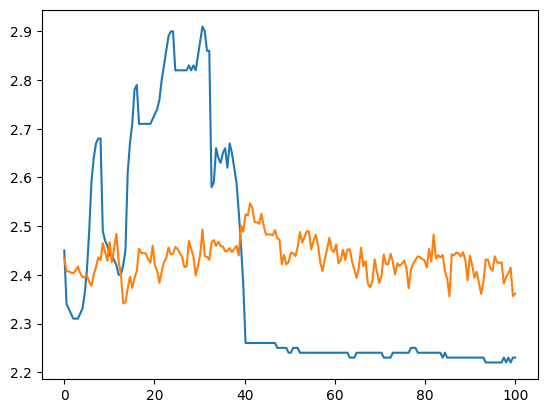

In [49]:
# fig, ax = plt.subplots()
fig, ax = plt.subplots()
X = np.linspace(0, 100, 200)
Y1, Y2 = np.sin(X), np.cos(X)
ax.plot(X, Y_Real[:200], X, predictions[:200])
fig

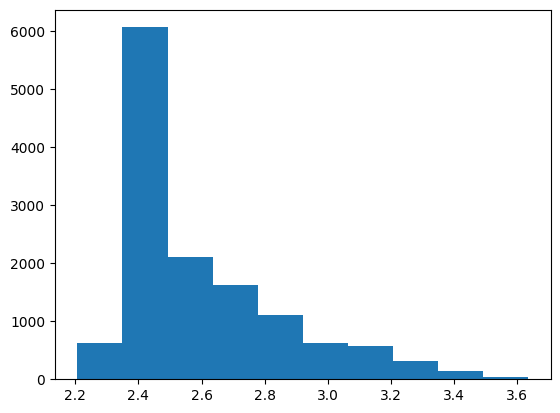

In [41]:
fig, ax = plt.subplots()
ax.hist(predictions)
fig

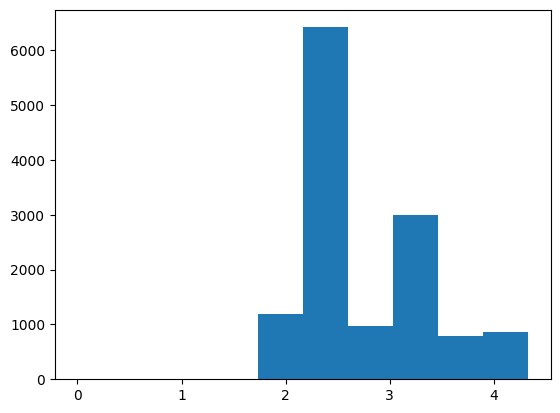

In [42]:
fig, ax = plt.subplots()
ax.hist(Y_Real)
fig

In [44]:
test = generator.flow_from_dataframe(
    dataframe=dfTest,
    x_col=' Filename',
    y_col=' Stage',
    target_size=(224, 224),
    batch_size=8, 
    class_mode='raw',
    validate_filenames=True,
    shuffle=False
)

Found 13248 validated image filenames.


In [45]:
predictions = model.predict(test)

1656/1656 [==============================] - 299s 176ms/step


In [46]:
Y_Real = test[0][1]
for i in range(1,len(test),1):
    Y_Real = np.concatenate((Y_Real, test[i][1]))

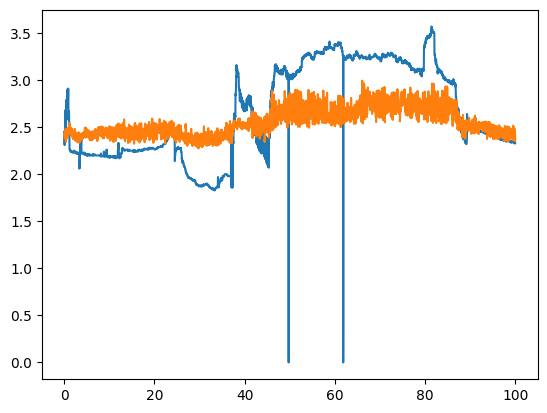

In [47]:
fig, ax = plt.subplots()
X = np.linspace(0, 100, 7000)
Y1, Y2 = np.sin(X), np.cos(X)
ax.plot(X, Y_Real[:7000], X, predictions[:7000])
fig

In [50]:
np.savetxt("predictions_efficientStage2.txt", predictions, delimiter=",")

In [54]:
test[0][1]

array([2.45, 2.34, 2.33, 2.32, 2.31, 2.31, 2.31, 2.32])